In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
data=pd.read_csv("housing.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
proximity=data['ocean_proximity'].unique()
print(proximity)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
missing_values= data.isnull().sum()
missing_percentage=(missing_values/len(data))*100
print(f"missing values:\n {missing_values}")
print(f"missing percentage:\n {missing_percentage}")

missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
missing percentage:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [ ]:
data_cleaned= data.dropna()
data=data_cleaned

data exploration and visualization

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


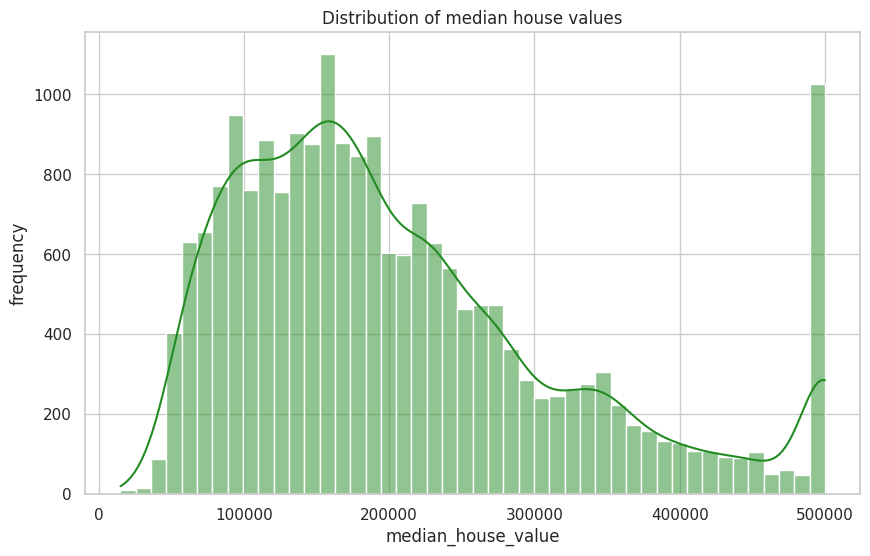

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['median_house_value'],color='forestgreen',kde=True)
plt.title("Distribution of median house values")
plt.xlabel("median_house_value")
plt.ylabel("frequency")
plt.show()

In [ ]:
Q1=data_cleaned['median_house_value'].quantile(0.25)
print(f"Q1: {Q1}")
Q3=data_cleaned['median_house_value'].quantile(0.75)
print(f"Q3: {Q3}")
IQR=Q3-Q1
print(f"IQR: {IQR}")

Q1: 119500.0
Q3: 264700.0
IQR: 145200.0


defining bound for outlier

In [ ]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower bound: {lower_bound} \nand upper bound: {upper_bound}")

lower bound: -98300.0 
and upper bound: 482500.0


removing outlier

In [ ]:
data_withno_outlier=data_cleaned[(data_cleaned["median_house_value"] >= lower_bound) & (data_cleaned["median_house_value"] <= upper_bound)]
print(f"data with outlier shape: {data_cleaned.shape}\n data without outlier shape: {data_withno_outlier.shape}")

data with outlier shape: (20433, 10)
 data without outlier shape: (19369, 10)


box plot for **bold text** outlier detection

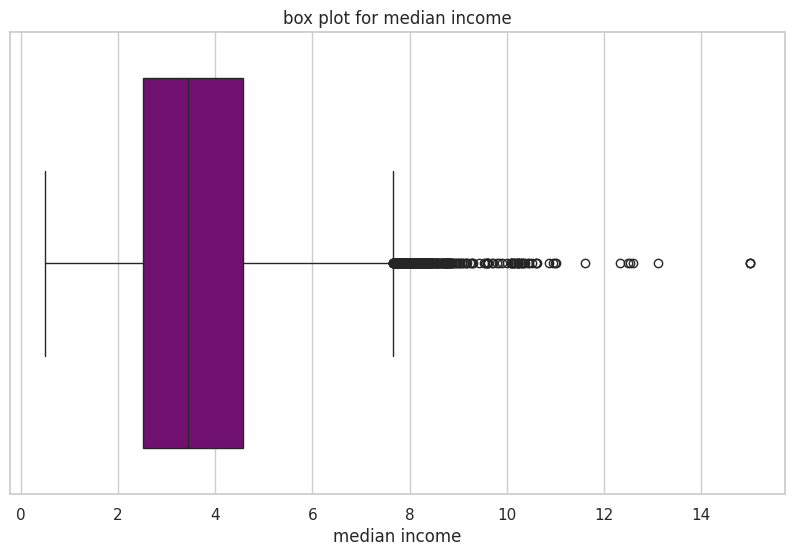

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_withno_outlier['median_income'],color="purple")
plt.title("box plot for median income")
plt.xlabel("median income")
plt.show()

In [ ]:
Q1=data_withno_outlier['median_income'].quantile(0.25)
Q3=data_withno_outlier['median_income'].quantile(0.75)
print(f"Q1: {Q1}\n Q3: {Q3}")
IQR=Q3-Q1
print(f"IQR: {IQR}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower bound: {lower_bound}\n upper bound: {upper_bound}")

Q1: 2.5223
 Q3: 4.5724
IQR: 2.0501
lower bound: -0.5528499999999998
 upper bound: 7.64755


In [ ]:
data=data_withno_outlier[(data_withno_outlier['median_income']>= lower_bound) & (data_withno_outlier['median_income']<=upper_bound)]
print(f"shape of data withno outlier with median_house_value:{data_withno_outlier.shape}\n shape with median income and median house value : {data.shape}")

shape of data withno outlier with median_house_value:(19369, 10)
 shape with median income and median house value : (19026, 10)


convert ocean proximity to numerical representation

In [ ]:
data_encoded=pd.get_dummies(data,columns=['ocean_proximity'],drop_first=True)
data=data_encoded

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,True,False


correlation map heat

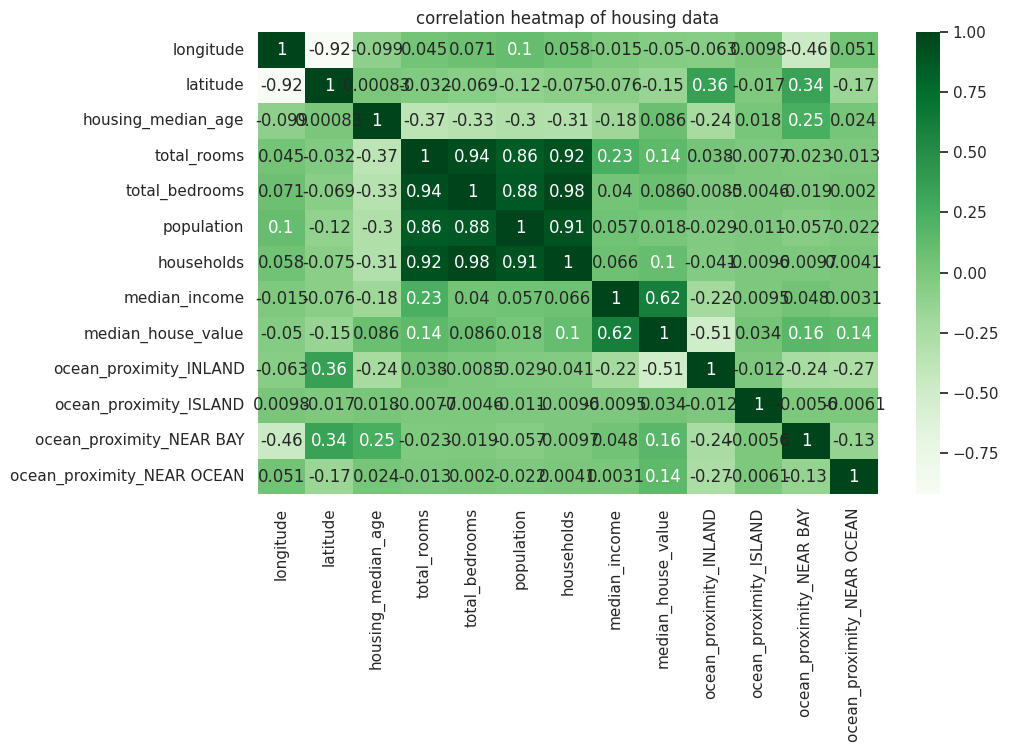

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.corr(),annot=True,cmap="Greens")
plt.title("correlation heatmap of housing data")
plt.show()

dropping total bedroom data.drop("total_bedroom",axis=1)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,True,False


In [ ]:
ocean_proximity=pd.get_dummies(data['ocean_proximity'],prefix='ocean_proximity')
ocean_proximity.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False


In [ ]:
data=pd.concat([data.drop('ocean_proximity',axis=1),ocean_proximity],axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,False,True,False


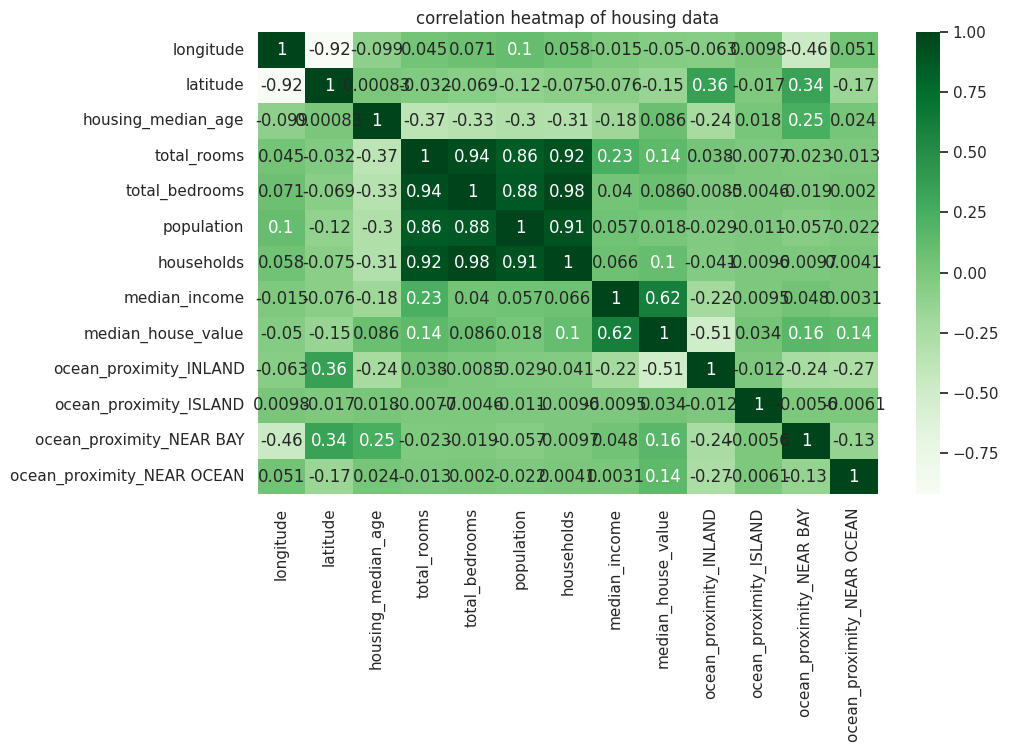

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap="Greens")
plt.title("correlation heatmap of housing data")
plt.show()

In [ ]:
data=data.drop('ocean_proximity_ISLAND',axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,True,False


In [ ]:
data=data.drop("total_bedrooms",axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,False,False,True,False


In [ ]:
feature=data.columns.to_list()
x=data[feature]
target="median_house_value"
y=data[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=49)

In [ ]:
x_train_const=sm.add_constant(x_train)
x_train_const.head()

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15206,1.0,-117.06,33.01,9.0,2470.0,904.0,427.0,4.4219,209200.0,False,False,False,False
713,1.0,-122.09,37.67,48.0,1252.0,673.0,308.0,2.3357,175000.0,False,False,True,False
11205,1.0,-117.91,33.83,37.0,1039.0,719.0,243.0,3.0288,161400.0,False,False,False,False
689,1.0,-122.12,37.70,41.0,3495.0,1849.0,750.0,2.6790,144900.0,False,False,True,False
1776,1.0,-122.34,37.94,42.0,2206.0,989.0,444.0,3.1250,143900.0,False,False,True,False


In [ ]:
x_train_const=x_train_const.astype(float)
model_fit=sm.OLS(y_train,x_train_const).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.357e+33
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:23:17   Log-Likelihood:             3.3752e+05
No. Observations:               15220   AIC:                        -6.750e+05
Df Residuals:                   15207   BIC:                        -6.749e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

prediction and testing

In [ ]:
x_test_const=sm.add_constant(x_test)
x_test_const=x_test_const.astype(float)
test_prediction=model_fit.predict(x_test_const)

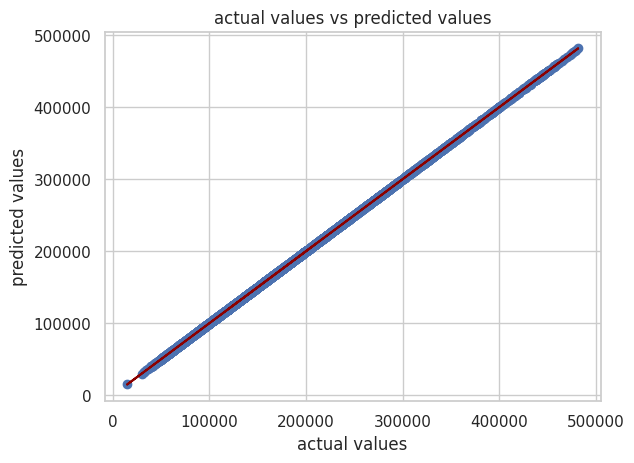

In [ ]:
plt.scatter(y_test,test_prediction)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("actual values vs predicted values")
plt.plot(y_test,y_test,color="darkred")
plt.show()

In [ ]:
mean_residual=np.mean(model_fit.resid)
print(f"mean residual: {mean_residual}")

mean residual: -4.7773808620578846e-11


assumption 3 exogenity

In [ ]:
residual=model_fit.resid
for column in x_train.columns:
  corr_coefficient=np.corrcoef(x_train[column],residual)[0,1]
  print(f"correlation coefficient for {column}: {corr_coefficient}")

correlation coefficient for longitude: 0.37039947523582833
correlation coefficient for latitude: -0.5057057252573322
correlation coefficient for housing_median_age: -0.25521732748922926
correlation coefficient for total_rooms: 0.033374626589575226
correlation coefficient for population: -0.184396992185377
correlation coefficient for households: -0.161251589304049
correlation coefficient for median_income: 0.35853582180473315
correlation coefficient for median_house_value: 0.3106651839578354
correlation coefficient for ocean_proximity_INLAND: -0.35252995852697894
correlation coefficient for ocean_proximity_ISLAND: 0.1328936591517774
correlation coefficient for ocean_proximity_NEAR BAY: -0.10721079370204886
correlation coefficient for ocean_proximity_NEAR OCEAN: 0.20973596860680332


assumption 4 Homoskedasticity

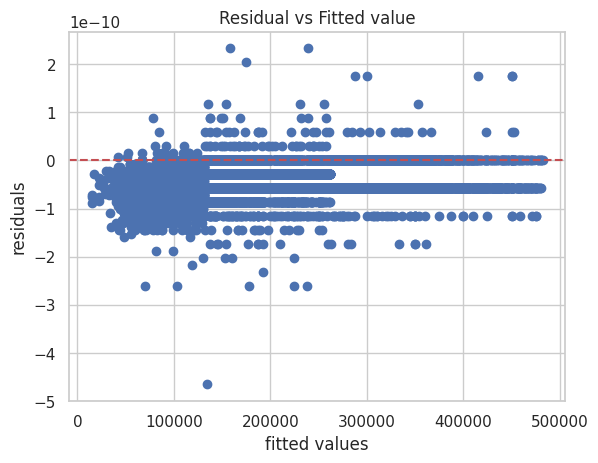

In [ ]:
plt.scatter(model_fit.fittedvalues,model_fit.resid)
plt.axhline(y=0,color='r',linestyle="--")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.title("Residual vs Fitted value")
plt.show()

train test using sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt

In [ ]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_prediction=lr.predict(x_test_scaled)

In [ ]:
mse=mean_squared_error(y_test,y_prediction)
rmse=sqrt(mse)
print(f"mean squared error on test:{mse} \n RMSE on test:{rmse}")

mean squared error on test:1422649.4106074001 
 RMSE on test:1192.7486787280043


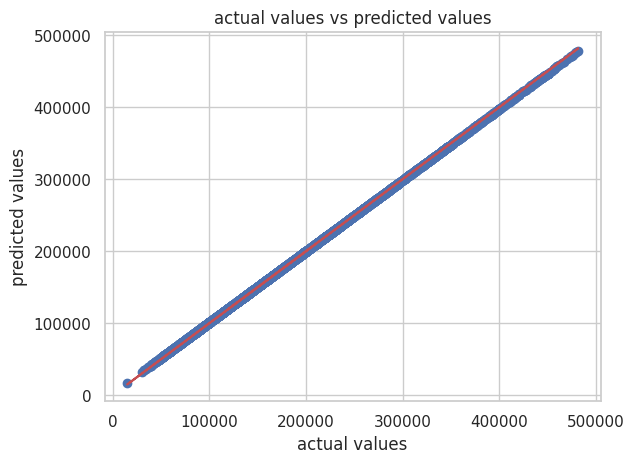

In [ ]:
plt.scatter(y_test,y_prediction)
plt.plot(y_test,y_test,color='r')
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("actual values vs predicted values")
plt.show()